# Playing around with simple policy gradient methods

In [1]:
%matplotlib inline

import numpy as np
import gym
import sys
import time
from matplotlib import pyplot as plt
import logging

sys.path.append("../../")
from reinforcing_fun.agents import DrunkHamster, DiscretePolicyAgent, DiscreteActorCriticAgent
from reinforcing_fun.training import ReinforceTrainer, MCActorCriticTrainer, TD0ActorCriticTrainer

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)


## Helper functions

In [2]:
def run_episode(env, agent, max_steps=1000, stop_when_done=True, render=True, fps=30):
    state = env.reset()
    reward = 0.
    episode_reward = 0.

    for _ in range(max_steps):
        if fps is not None:
            time.sleep(1./fps)
        if render:
            env.render()
        action = agent(state)[0]
        state, reward, done, info = env.step(action)
        episode_reward += reward

        if stop_when_done and done:
            if fps is not None:
                time.sleep(0.5)
            break
        
    return episode_reward
        

def run(env, agent, num_episodes=1, max_steps=1000, stop_when_done=True, render=True, fps=30):
    total_reward = 0.
    for _ in range(num_episodes):
        total_reward += run_episode(env, agent, max_steps, stop_when_done, render, fps)
    return total_reward


In [3]:
def running_mean(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

## Cart pole experiments

In [4]:
num_episodes = 2000
env = gym.make("CartPole-v0")

agents = {}
rewards = {}
lengths = {}
losses = {}

def train(agent_class, trainer_class, label, lr=1.e-3, critic_factor=1., entropy_factor=0.):
    agent = agent_class(env, 4)
    trainer = trainer_class(env, agent, lr=lr)
    reward, length, loss = trainer.train(
        num_episodes=num_episodes, critic_factor=critic_factor, entropy_factor=entropy_factor
    )
    
    agents[label] = agent
    rewards[label] = reward
    lengths[label] = length
    losses[label] = loss / length[:,np.newaxis]

In [5]:
train(
    DiscretePolicyAgent, ReinforceTrainer,
    "REINFORCE"
)

18:25 reinforcing_fun.training.base  INFO    Episode 100: reward = 26.02, losses = [7.49936669 0.         0.69199156]
18:25 reinforcing_fun.training.base  INFO    Episode 200: reward = 42.0, losses = [9.87757798 0.         0.66091789]
18:25 reinforcing_fun.training.base  INFO    Episode 300: reward = 82.96, losses = [13.63207417  0.          0.63129764]
18:25 reinforcing_fun.training.base  INFO    Episode 400: reward = 133.45, losses = [15.39201462  0.          0.58804653]
18:25 reinforcing_fun.training.base  INFO    Episode 500: reward = 180.71, losses = [16.43246431  0.          0.55843535]
18:26 reinforcing_fun.training.base  INFO    Episode 600: reward = 182.86, losses = [16.30524281  0.          0.55103593]
18:26 reinforcing_fun.training.base  INFO    Episode 700: reward = 188.1, losses = [16.43178683  0.          0.55556224]
18:26 reinforcing_fun.training.base  INFO    Episode 800: reward = 190.65, losses = [16.17666548  0.          0.54721355]
18:26 reinforcing_fun.training.base

In [6]:
train(
    DiscreteActorCriticAgent, MCActorCriticTrainer,
    "MC actor-critic",
    critic_factor=10.
)

18:28 reinforcing_fun.training.base  INFO    Episode 100: reward = 30.88, losses = [318.55852484   0.86483626   0.68156331]
18:28 reinforcing_fun.training.base  INFO    Episode 200: reward = 51.76, losses = [6.54485504e+02 8.92149795e-01 6.35681015e-01]
18:28 reinforcing_fun.training.base  INFO    Episode 300: reward = 85.78, losses = [1.31461264e+03 7.51799452e-01 6.09368616e-01]
18:28 reinforcing_fun.training.base  INFO    Episode 400: reward = 161.46, losses = [2.80486383e+03 6.06947904e-01 5.95300160e-01]
18:28 reinforcing_fun.training.base  INFO    Episode 500: reward = 181.97, losses = [3.13455856e+03 7.06007061e-01 5.85576964e-01]
18:28 reinforcing_fun.training.base  INFO    Episode 600: reward = 189.97, losses = [3.32757225e+03 8.30659598e-01 5.91641971e-01]
18:29 reinforcing_fun.training.base  INFO    Episode 700: reward = 185.16, losses = [3.23645520e+03 4.89716017e-01 5.91787736e-01]
18:29 reinforcing_fun.training.base  INFO    Episode 800: reward = 195.38, losses = [3.39231

In [7]:
train(
    DiscreteActorCriticAgent, TD0ActorCriticTrainer,
    "One-step actor-critic",
    critic_factor=10.
)

18:31 reinforcing_fun.training.base  INFO    Episode 100: reward = 17.34, losses = [ 0.34650274  0.57779833 -0.51449203]
18:31 reinforcing_fun.training.base  INFO    Episode 200: reward = 11.49, losses = [ 0.10466687  0.22334006 -0.30713518]
18:31 reinforcing_fun.training.base  INFO    Episode 300: reward = 10.04, losses = [ 0.02318998  0.07294097 -0.16079129]
18:31 reinforcing_fun.training.base  INFO    Episode 400: reward = 9.91, losses = [ 0.01527047  0.04049908 -0.14866011]
18:31 reinforcing_fun.training.base  INFO    Episode 500: reward = 9.71, losses = [ 0.00457421  0.01637385 -0.11655477]
18:31 reinforcing_fun.training.base  INFO    Episode 600: reward = 10.13, losses = [ 0.01546016  0.02841276 -0.17856987]
18:31 reinforcing_fun.training.base  INFO    Episode 700: reward = 9.69, losses = [ 0.00112538  0.01409197 -0.09638718]
18:31 reinforcing_fun.training.base  INFO    Episode 800: reward = 9.46, losses = [-0.00145636  0.00190035 -0.04037996]
18:31 reinforcing_fun.training.base 

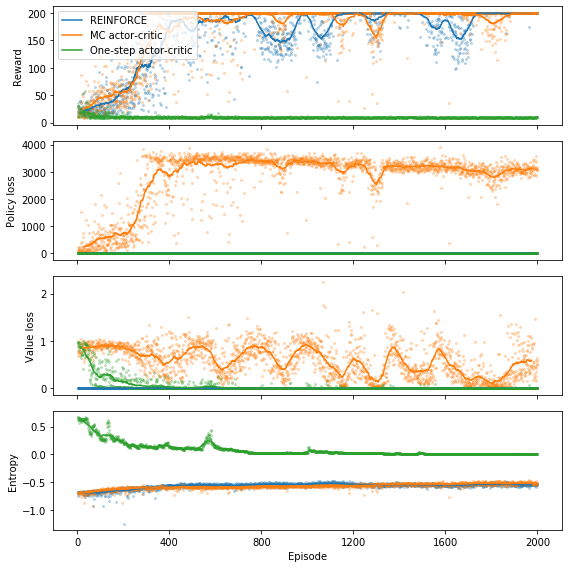

In [8]:
ticks = np.linspace(0., num_episodes, 6)
fig = plt.figure(figsize=(8,8))

ax = plt.subplot(4,1,1)
for i, (key, val) in enumerate(rewards.items()):
    plt.scatter(np.arange(1, num_episodes+1), val, c="C{}".format(i), s=4., alpha=0.25, rasterized=True)
    plt.plot(np.arange(25, num_episodes-24), running_mean(val, 50), lw=1.5, label=key, c="C{}".format(i), zorder=1)
plt.legend(loc="upper left")
plt.ylabel("Reward")
plt.xticks(ticks, labels=["" for _ in ticks])

ax = plt.subplot(4,1,2)
for i, (key, val) in enumerate(losses.items()):
    plt.scatter(np.arange(1, num_episodes+1), val[:,0], c="C{}".format(i), s=4., alpha=0.25, rasterized=True)
    plt.plot(np.arange(25, num_episodes-24), running_mean(val[:,0], 50), lw=1.5, label=key, c="C{}".format(i), zorder=1)
plt.ylabel("Policy loss")
plt.xticks(ticks, labels=["" for _ in ticks])

ax = plt.subplot(4,1,3)
for i, (key, val) in enumerate(losses.items()):
    plt.scatter(np.arange(1, num_episodes+1), val[:,1], c="C{}".format(i), s=4., alpha=0.25, rasterized=True)
    plt.plot(np.arange(25, num_episodes-24), running_mean(val[:,1], 50), lw=1.5, label=key, c="C{}".format(i), zorder=1)
plt.ylabel("Value loss")
plt.xticks(ticks, labels=["" for _ in ticks])

ax = plt.subplot(4,1,4)
for i, (key, val) in enumerate(losses.items()):
    plt.scatter(np.arange(1, num_episodes+1), - val[:,2], c="C{}".format(i), s=4., alpha=0.25, rasterized=True)
    plt.plot(np.arange(25, num_episodes-24), running_mean(- val[:,2], 50), lw=1.5, label=key, c="C{}".format(i), zorder=1)
plt.ylabel("Entropy")
plt.xlabel("Episode")
plt.xticks(ticks)

plt.tight_layout()
plt.savefig("policy_gradient_cartpole.pdf")


In [9]:
run(env, agents["REINFORCE"])

200.0

In [10]:
env.close()

## Space Invaders

In [11]:
num_episodes = 10000
env = gym.make("SpaceInvaders-ram-v0")

agents = {}
rewards = {}
lengths = {}
losses = {}

def train(agent_class, trainer_class, label, lr=1.e-3, critic_factor=1., entropy_factor=0.):
    agent = agent_class(env, 128)
    trainer = trainer_class(env, agent, lr=lr)
    reward, length, loss = trainer.train(
        num_episodes=num_episodes, critic_factor=critic_factor, entropy_factor=entropy_factor
    )
    
    agents[label] = agent
    rewards[label] = reward
    lengths[label] = length
    losses[label] = loss / length[:,np.newaxis]

In [ ]:
train(DiscretePolicyAgent, ReinforceTrainer, "REINFORCE")

19:55 reinforcing_fun.training.base  INFO    Episode 100: reward = 270.0, losses = [7.47280673e-07 0.00000000e+00 1.19209290e-07]
19:56 reinforcing_fun.training.base  INFO    Episode 200: reward = 270.0, losses = [7.48817428e-07 0.00000000e+00 1.19209290e-07]


In [ ]:
train(DiscreteActorCriticAgent, MCActorCriticTrainer, "MC actor-critic")

In [ ]:
def running_mean(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)


ticks = np.linspace(0., num_episodes, 6)


fig = plt.figure(figsize=(8,8))

ax = plt.subplot(3,1,1)
for i, (key, val) in enumerate(rewards.items()):
    plt.scatter(np.arange(1, num_episodes+1), val, c="C{}".format(i), s=4., alpha=0.25, rasterized=True)
    plt.plot(np.arange(50, num_episodes-49), running_mean(val, 100), lw=1.5, label=key, c="C{}".format(i), zorder=1)
plt.legend(loc="upper left")
plt.ylabel("Reward")
plt.xticks(ticks, labels=["" for _ in ticks])

ax = plt.subplot(3,1,2)
for i, (key, val) in enumerate(lengths.items()):
    plt.scatter(np.arange(1, num_episodes+1), val, c="C{}".format(i), s=4., alpha=0.25, rasterized=True)
    plt.plot(np.arange(50, num_episodes-49), running_mean(val, 100), lw=1.5, label=key, c="C{}".format(i), zorder=1)
plt.ylabel("Episode length")
plt.xticks(ticks, labels=["" for _ in ticks])

ax = plt.subplot(3,1,3)
for i, (key, val) in enumerate(losses.items()):
    plt.scatter(np.arange(1, num_episodes+1), val, c="C{}".format(i), s=4., alpha=0.25, rasterized=True)
    plt.plot(np.arange(50, num_episodes-49), running_mean(val, 100), lw=1.5, label=key, c="C{}".format(i), zorder=1)
plt.ylabel("Mean loss")
plt.xlabel("Episode")
plt.xticks(ticks)

plt.tight_layout()
plt.savefig("policy_gradient_spaceinvaders.pdf")


In [ ]:
run(env, agents["REINFORCE"])